In [43]:
from google.colab import drive

In [44]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### **Importing all the necessary librabries**

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

### **Dataset Description:**

Model:

4WD/4X4 = Four-wheel drive

AWD = All-wheel drive

FFV = Flexible-fuel vehicle

SWB = Short wheelbase

LWB = Long wheelbase

EWB = Extended wheelbase


---


Transmission:

A = Automatic

AM = Automated manual

AS = Automatic with select shift

AV = Continuously variable

M = Manual

3 - 10 = Number of gears


---


Fuel type: 

X = Regular gasoline

Z = Premium gasoline

D = Diesel

E = Ethanol (E85)

N = Natural gas


---

Other Features: 

Make= Company of the vehicle

Model= Car model

Vehicle Class= Class of vehicle depending on their
 utility, capacity and weight

Engine Size = Size of engine used in Litre

Cylinders= Number of cylinders

Transmission = Transmission type with number of gears

Fuel type =Type of Fuel used

Fuel Consumption City=Fuel consumption in city roads (L/100 km)

Fuel Consumption Hwy=Fuel consumption in Hwy roads (L/100 km)

Fuel Consumption Comb=The combined fuel consumption (55% city, 45% highway) is shown in L/100 km

Fuel Consumption Comb mpg =The combined fuel consumption in both city and highway is shown in mile per gallon(mpg)

In [46]:
df=pd.read_csv('/content/drive/MyDrive/CO2 Emissions_Canada.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### **Reading the dataset**

In [47]:
df.shape

(7385, 12)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

### **Exploratory Data Analysis**

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [50]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [51]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [52]:
df.nunique()

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64

In [53]:
df['Make'].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

### **Visualizing various features of the dataset**

In [54]:
df_Make=df['Make'].value_counts().reset_index().rename(columns={'index':'Make','Make':'Count'})[0:25]
df_Make
fig = go.Figure(go.Bar(
    x=df_Make['Make'],y=df_Make['Count'],
    marker={'color': df_Make['Count'], 
    'colorscale': 'Viridis'},  
    text=df_Make['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='Top 25 Company',xaxis_title="Company ",yaxis_title="Number Of Vehicles ",title_x=0.5)
fig.show()

In [55]:
df_ford=df[df["Make"]=="FORD"]
df_ford_model=df_ford["Model"].value_counts().reset_index().rename(columns={'index':'Model','Model':'Count'})[0:10]
fig = go.Figure(go.Bar(
    x=df_ford_model['Model'],y=df_ford_model['Count'],
    marker={'color': df_ford_model['Count'], 
    'colorscale': 'Viridis'},  
    text=df_ford_model['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='Top 10 Ford Model',xaxis_title="Model ",yaxis_title="Number Of Vehicles ",title_x=0.5)
fig.show()

In [56]:
df_Model=df['Model'].value_counts().reset_index().rename(columns={'index':'Model','Model':'Count'})[0:20]

fig = go.Figure(go.Bar(
    x=df_Model['Model'],y=df_Model['Count'],
    marker={'color': df_Model['Count'], 
    'colorscale': 'Viridis'},  
    text=df_Model['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='Top 20 Model',xaxis_title="Model ",yaxis_title="Number Of Vehicles ",title_x=0.5)
fig.show()

In [57]:
df_Vehicle_Class=df['Vehicle Class'].value_counts().reset_index().rename(columns={'index':'Vehicle_Class','Vehicle Class':'Count'})
fig = go.Figure(go.Bar(
    x=df_Vehicle_Class['Vehicle_Class'],y=df_Vehicle_Class['Count'],
    marker={'color': df_Vehicle_Class['Count'], 
    'colorscale': 'Viridis'},  
    text=df_Vehicle_Class['Count'],
    textposition = "outside",
))
fig.update_layout(title_text=' Vehicle Class',xaxis_title="Vehicle Class",yaxis_title="Number Of Vehicles ",title_x=0.5)
fig.show()

In [58]:
fig = px.histogram(df, x="Cylinders")
fig.update_layout(title_text='Distribution Of Cylinders  ',xaxis_title=" Cylinders ",yaxis_title="Number Of Vehicles ",title_x=0.5)
fig.show()

In [59]:
df["Gears"]= df['Transmission'].str[-1]

df['Transmission']=df['Transmission'].str[0:-1]
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Gears
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196,5
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221,6
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136,7
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255,6
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244,6


In [60]:
df_Transmission=df['Transmission'].value_counts().reset_index().rename(columns={'index':'Transmission','Transmission':'Count'})
df_Transmission
fig = px.pie(df_Transmission, values='Count', names='Transmission')

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12)
fig.update_layout(title="Transmission Distribution",title_x=0.5)
fig.show()

In [61]:
df_Transmission=df['Transmission'].value_counts().reset_index().rename(columns={'index':'Transmission','Transmission':'Count'})

fig = go.Figure(go.Bar(
    x=df_Transmission['Transmission'],y=df_Transmission['Count'],
    marker={'color': df_Transmission['Count'], 
    'colorscale': 'Viridis'},  
    text=df_Transmission['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='Transmission Distribution ',xaxis_title="Transmission ",yaxis_title="Number Of Vehicles ",title_x=0.5)
fig.show()

In [62]:
df_Gears=df['Gears'].value_counts().reset_index().rename(columns={'index':'Gears','Gears':'Count'})
df_Gears
fig = px.pie(df_Gears, values='Count', names='Gears')

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12)
fig.update_layout(title="Gears Distribution",title_x=0.5)
fig.show()

In [63]:
df_Fuel_Type=df['Fuel Type'].value_counts().reset_index().rename(columns={'index':'Fuel_Type','Fuel Type':'Count'})

fig = go.Figure(go.Bar(
    x=df_Fuel_Type['Fuel_Type'],y=df_Fuel_Type['Count'],
    marker={'color': df_Fuel_Type['Count'], 
    'colorscale': 'Viridis'},  
    text=df_Fuel_Type['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='Fuel Type Distribution ',xaxis_title="Fuel Type  ",yaxis_title="Number Of Vehicles ",title_x=0.5)
fig.show()

In [64]:
city=df['Fuel Consumption City (L/100 km)']
highway = df['Fuel Consumption Hwy (L/100 km)']
city_hwy_df = df[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Type','CO2 Emissions(g/km)']]
city_hwy_df.head()

,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Type,CO2 Emissions(g/km)
0,9.9,6.7,Z,196
1,11.2,7.7,Z,221
2,6.0,5.8,Z,136
3,12.7,9.1,Z,255
4,12.1,8.7,Z,244


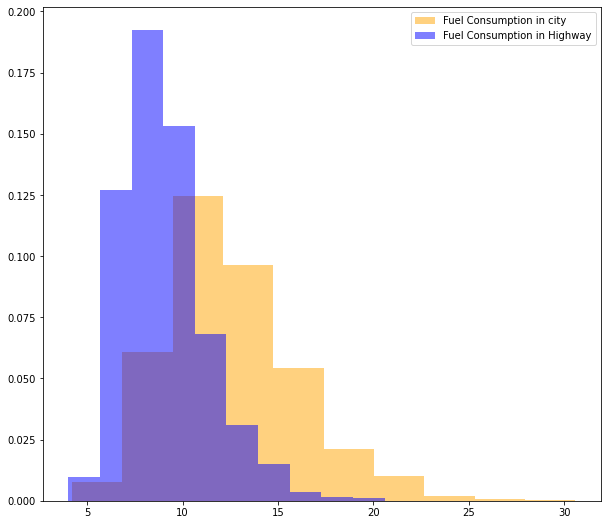

In [65]:
fig = plt.figure(figsize = (10,20))
ax = fig.add_subplot(2,1,1)
ax = plt.hist(city, color="orange", label="Fuel Consumption in city", density=True, alpha=0.5)
ax = plt.hist(highway, color="blue", label="Fuel Consumption in Highway", density=True, alpha=0.5)
ax = plt.legend()
plt.show()

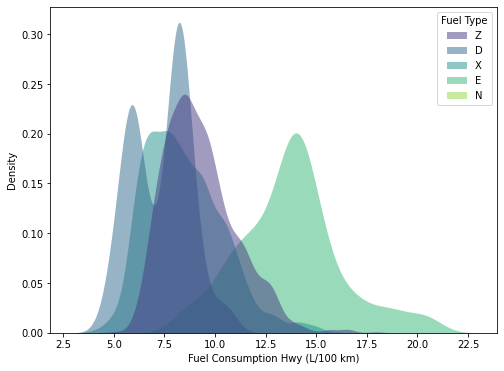

In [66]:
sns.kdeplot(
   data=city_hwy_df, x="Fuel Consumption Hwy (L/100 km)", hue="Fuel Type",
   fill=True, common_norm=False, palette="viridis",
   alpha=.5, linewidth=0,
)

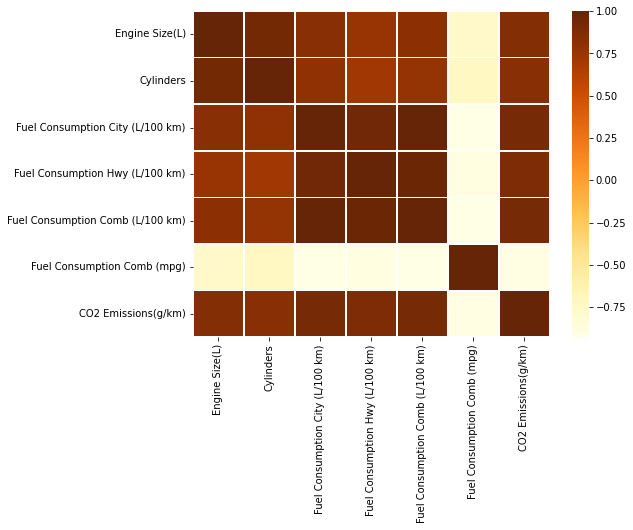

In [67]:
plt.rcParams['figure.figsize']=(8,6)
sns.heatmap(df.corr(),cmap='YlOrBr',linewidths=.5,fmt=".2f",annot = False);

### **Data Preprocessing**

In [68]:
dums = pd.get_dummies(df['Fuel Type'],prefix="Fuel_Type",drop_first=True)
dums[0:10]

,Fuel_Type_E,Fuel_Type_N,Fuel_Type_X,Fuel_Type_Z
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,0,0,0,1
6,0,0,0,1
7,0,0,0,1
8,0,0,0,1
9,0,0,0,1


In [69]:
df.drop(['Make','Model','Vehicle Class','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Transmission','Gears','Fuel Consumption Comb (mpg)'],inplace=True,axis=1)

In [80]:
result = pd.concat([df,dums],axis=1)
result

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Fuel_Type_E,Fuel_Type_N,Fuel_Type_X,Fuel_Type_Z
0,2.0,4,Z,8.5,196,0,0,0,1
1,2.4,4,Z,9.6,221,0,0,0,1
2,1.5,4,Z,5.9,136,0,0,0,1
3,3.5,6,Z,11.1,255,0,0,0,1
4,3.5,6,Z,10.6,244,0,0,0,1
...,...,...,...,...,...,...,...,...,...
7380,2.0,4,Z,9.4,219,0,0,0,1
7381,2.0,4,Z,9.9,232,0,0,0,1
7382,2.0,4,Z,10.3,240,0,0,0,1
7383,2.0,4,Z,9.9,232,0,0,0,1


In [92]:
result.drop(['Fuel Type'],inplace=True,axis=1)
result.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Fuel_Type_E,Fuel_Type_N,Fuel_Type_X,Fuel_Type_Z
0,2.0,4,8.5,196,0,0,0,1
1,2.4,4,9.6,221,0,0,0,1
2,1.5,4,5.9,136,0,0,0,1
3,3.5,6,11.1,255,0,0,0,1
4,3.5,6,10.6,244,0,0,0,1


### **Finding the outliers and removing them from our dataset**

In [93]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [94]:
# df_out=result.copy()
clf.fit_predict(result)
df_scores = clf.negative_outlier_factor_

In [95]:
np.sort(df_scores)[0:25]

array([-2.29177231e+10, -2.29177231e+10, -1.72980018e+10, -1.72980018e+10,
       -5.51234422e+09, -5.02244403e+09, -5.02244403e+09, -2.50810479e+09,
       -2.50810479e+09, -2.50810479e+09, -2.50810479e+09, -2.50810479e+09,
       -2.50810479e+09, -2.50810479e+09, -1.46429970e+09, -1.04592836e+09,
       -1.04592836e+09, -1.04592836e+09, -1.00000000e+09, -7.40000001e+08,
       -7.40000001e+08, -7.40000001e+08, -7.40000001e+08, -7.40000001e+08,
       -7.40000001e+08])

In [96]:
threshold_value = np.sort(df_scores)[24]
threshold_value

-740000001.0349972

In [97]:
Outlier_df= df_out[df_scores < threshold_value]
indexs=Outlier_df.index
Outlier_df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Gears,Fuel_Type_E,Fuel_Type_N,Fuel_Type_X,Fuel_Type_Z
935,SCION,FR-S,MINICOMPACT,2.0,4,M,10.9,7.8,9.5,30,218,6,0,0,0,1
949,SUBARU,FORESTER AWD,SUV - SMALL,2.0,4,A,10.2,8.6,9.5,30,218,V,0,0,0,1
2152,VOLKSWAGEN,EOS,SUBCOMPACT,2.0,4,AM,10.8,7.8,9.5,30,219,6,0,0,0,1
2398,CHEVROLET,CAMARO,COMPACT,2.0,4,AS,10.9,7.5,9.3,30,218,8,0,0,0,1
3292,VOLVO,S60 T6,COMPACT,2.0,4,AS,10.6,7.7,9.3,30,218,8,0,0,0,1
4071,MERCEDES-BENZ,C 300 4MATIC COUPE,SUBCOMPACT,2.0,4,AS,10.4,8.0,9.3,30,218,7,0,0,0,1
4168,NISSAN,JUKE NISMO RS AWD,STATION WAGON - SMALL,1.6,4,AV,9.5,8.3,8.9,32,209,8,0,0,0,1
4379,ACURA,TLX A-SPEC,COMPACT,2.4,4,AM,10.2,7.4,8.9,32,209,8,0,0,0,1
5152,MERCEDES-BENZ,C 300 4MATIC COUPE,SUBCOMPACT,2.0,4,A,10.5,7.8,9.3,30,218,9,0,0,0,1
5463,ACURA,TLX A-SPEC,COMPACT,2.4,4,AM,10.2,7.4,8.9,32,209,8,0,0,0,1


In [98]:
# Kick Outliers
for i in indexs:
    result.drop(i, axis = 0,inplace = True)

In [99]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7366 entries, 0 to 7384
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Engine Size(L)                    7366 non-null   float64
 1   Cylinders                         7366 non-null   int64  
 2   Fuel Consumption Comb (L/100 km)  7366 non-null   float64
 3   CO2 Emissions(g/km)               7366 non-null   int64  
 4   Fuel_Type_E                       7366 non-null   uint8  
 5   Fuel_Type_N                       7366 non-null   uint8  
 6   Fuel_Type_X                       7366 non-null   uint8  
 7   Fuel_Type_Z                       7366 non-null   uint8  
dtypes: float64(2), int64(2), uint8(4)
memory usage: 316.5 KB


In [100]:
result.shape

(7366, 8)

### **Building ML Models**

In [109]:
X = result.drop(['CO2 Emissions(g/km)'], axis= 1)
y = result["CO2 Emissions(g/km)"]

In [110]:
X

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),Fuel_Type_E,Fuel_Type_N,Fuel_Type_X,Fuel_Type_Z
0,2.0,4,8.5,0,0,0,1
1,2.4,4,9.6,0,0,0,1
2,1.5,4,5.9,0,0,0,1
3,3.5,6,11.1,0,0,0,1
4,3.5,6,10.6,0,0,0,1
...,...,...,...,...,...,...,...
7380,2.0,4,9.4,0,0,0,1
7381,2.0,4,9.9,0,0,0,1
7382,2.0,4,10.3,0,0,0,1
7383,2.0,4,9.9,0,0,0,1


In [111]:
# Normalize
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values

In [112]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

X_train (5524, 7)
y_train (5524,)
X_test (1842, 7)
y_test (1842,)


### **Linear Regression**

In [113]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [114]:
y_pred = lm.predict(X_test)
print(f'R2 score is {r2_score(y_pred,y_test)}')

R2 score is 0.9906904790346527


### **K Nearest Neighbors**

In [115]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [116]:
y_pred1 = knn_model.predict(X_test)
print(f'R2 score is {r2_score(y_pred1,y_test)}')

R2 score is 0.9953043868029414


### **Support Vector Machine**

In [121]:
from sklearn.svm import SVR
svr_model = SVR().fit(X_train, y_train)

In [122]:
y_pred2 = svr_model.predict(X_test)
print(f'R2 score is {r2_score(y_pred2,y_test)}')

R2 score is 0.893171061989199


### **Random Forest Regression**

In [123]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [124]:
y_pred3 = rf_model.predict(X_test)
print(f'R2 score is {r2_score(y_pred3,y_test)}')

R2 score is 0.9960986852363114
